In [ ]:
# Variáveis categóricas
# existe um limite fixo de valores possíveis;
# cada observação é atribuída a um subgrupo específico.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

caminho = '/content/mtcars.csv'
carros = pd.read_csv(caminho)
carros.columns = ['nomes', 'npg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'qtd_marchas', 'carb']
carros.index = carros.nomes



In [ ]:
# selecionando as variáveis categoricas 
carros_cat = carros[['cyl', 'am', 'qtd_marchas', 'carb']]
marchas_grupo = carros_cat.groupby('qtd_marchas')
marchas_grupo.describe().T # metódo que transpõem a matriz

qtd_marchas          3          4         5
cyl  count   15.000000  12.000000  5.000000
     mean     7.466667   4.666667  6.000000
     std      1.187234   0.984732  2.000000
     min      4.000000   4.000000  4.000000
     25%      8.000000   4.000000  4.000000
     50%      8.000000   4.000000  6.000000
     75%      8.000000   6.000000  8.000000
     max      8.000000   6.000000  8.000000
am   count   15.000000  12.000000  5.000000
     mean     0.000000   0.666667  1.000000
     std      0.000000   0.492366  0.000000
     min      0.000000   0.000000  1.000000
     25%      0.000000   0.000000  1.000000
     50%      0.000000   1.000000  1.000000
     75%      0.000000   1.000000  1.000000
     max      0.000000   1.000000  1.000000
carb count   15.000000  12.000000  5.000000
     mean     2.666667   2.333333  4.400000
     std      1.175139   1.302678  2.607681
     min      1.000000   1.000000  2.000000
     25%      2.000000   1.000000  2.000000
     50%      3.000000   2.000000  4.000000
     75%      4.000000   4.000000  6.000000
     max      4.000000   4.000000  8.000000

In [ ]:
# transformando variáveis em dados categóricos
carros['grupo'] = pd.Series(carros['qtd_marchas'], dtype='category')


In [ ]:
carros.dtypes
carros['grupo'].head()

nomes
Mazda RX4            4
Mazda RX4 Wag        4
Datsun 710           4
Hornet 4 Drive       3
Hornet Sportabout    3
Name: grupo, dtype: category
Categories (3, int64): [3, 4, 5]

In [ ]:
# tabulação cruzada usando o metódo crosstabs
pd.crosstab(carros['am'], carros['qtd_marchas'])
# assim conseguimos comparar quantos carros com cambio manual e automatico possuem quantidades de marchas

qtd_marchas,3,4,5
am,,,
0,15,4,0
1,0,8,5


In [ ]:
# CORRELAÇÃO NÃO IMPLICA CAUSALIDADE 

# Correlação de PEARSON: pressupostos
# - seus dados possuem distribuição normal;
# - você tem variáveis numéricas/contínuas;
# - suas variáveis têm uma relação linear.

# sendo assim, pearson é bastante utilizado para descobrir relações lineares entre variáveis..
# .. não descartar relações possíveis(não-lineares) entre variáveis.



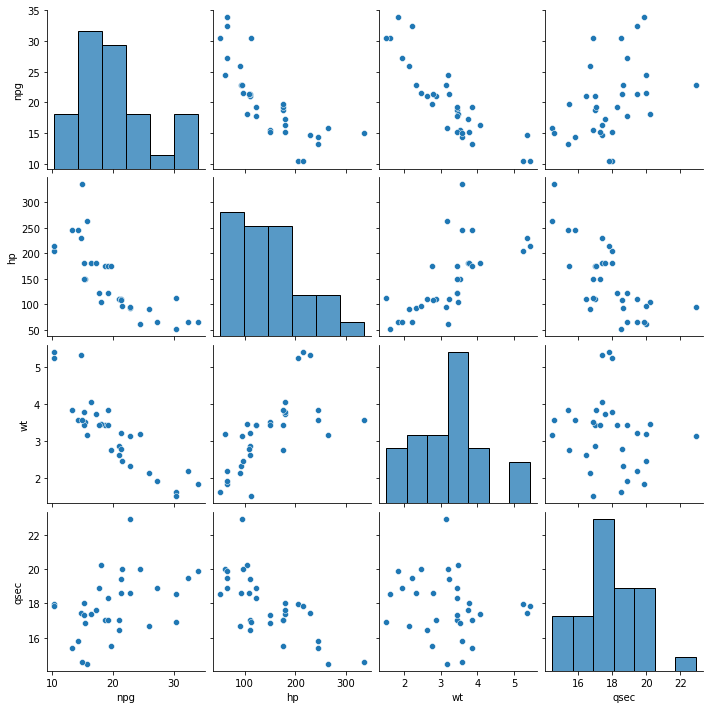

In [ ]:
# calculando o coeficiente de pearson

from scipy.stats.stats import pearsonr

X = carros[['npg', 'hp', 'wt', 'qsec']]
sns.pairplot(X)

In [ ]:
# Usando o scipy para calcular o coeficiente de correlação de Pearson - metodo parametricos
npg = carros['npg']
hp = carros['hp']
qsec = carros['qsec']
wt = carros['wt']

coeficiente_pearson, p_valor = pearsonr(npg, hp)
print(f'Coeficiente de pearson {coeficiente_pearson :.3}')

Coeficiente de pearson -0.776


In [ ]:
coeficiente_pearson, p_valor = pearsonr(npg, qsec)
print(f'Coeficiente de pearson {coeficiente_pearson :.3}')

Coeficiente de pearson 0.419


In [ ]:
coeficiente_pearson, p_valor = pearsonr(npg, wt)
print(f'Coeficiente de pearson {coeficiente_pearson :.3}')

Coeficiente de pearson -0.868


In [ ]:
# Usando o pandas para calcular o coeficiente de correlação de pearson
corr = X.corr()
corr
# por padrão o metodo corr faz os calculos de todos os coeficientes e retorna
# um novo dataframe com os resultados.- para todas as variáveis - 

,npg,hp,wt,qsec
npg,1.000000,-0.776168,-0.867659,0.418684
hp,-0.776168,1.000000,0.658748,-0.708223
wt,-0.867659,0.658748,1.000000,-0.174716
qsec,0.418684,-0.708223,-0.174716,1.000000


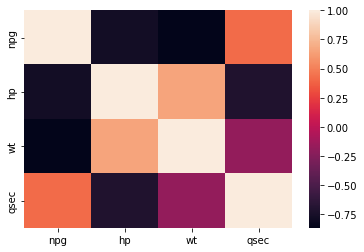

In [ ]:
# visualizando o coeficiente de pearson com o seaborn
_=sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
# após os calculos da correlação o seaborn mostrará abaixo um mapa de calor que 
# indica visualmente o quão relacionados estão cada uma das nossas variáveis. 
# logo cada cor do nosso mapa de calor corresponde a um valor de correlação.
# Quanto mais clarinho nesse caso mais, mais proximo do 1 e quanto mais escuro mais próximo do -1.

In [ ]:
# Agora iremos usar metodos não parametricos para correlações.
# usaremos esse tipo de analise para encontrar correlação 
# entre dados categoricos relacionados não linearmente para isso
# usaremos o metodo do spearman, tabela de qui-quadrado.

# O metodo do spearman encontra a correlação entre pares de variáveis
# com dados ordinais - que é um variável numérica que podemos transformar em um dado categorico - . Os pares podem então ser ordenados de acordo com
# a força da correlação entre eles.

# CORRELAÇÃO SPEARMAN: PRESSUPOSTOS
# - Suas variáveis são ordinais, ou seja, numéricas, mas capazes de serem ...
# ... interpretadas como dados categóricos;
# Suas variáveis não se relacionam linearmente;
# Os dados não apresentam distribuição normal.

# QUI-QUADRADO PARA TESTE DE INDEPENDÊNCIA
# Serve para testar a independência das variáveis. Sendo assim, a hipótese nula ..
# ... é que as variáveis são, de fato, independentes. Para isso, ao rodar o teste, ...
# ... se obtivermos um valor menor que 0.05, nós rejeitamos a hipótese nula e concluímos que ...
# ... as variáveis são correlacionadas;
# Caso contrário, aceitamos a hipótese nula e concluímos que as variáveis são independentes..
# PRESSUPOSTOS
# - Usamos o QUI-QUADRADO em variáveis numéricas ou categóricas;
# - *Se por um acaso a sua variável for contínua, precisamos dividir os valores em "bins"...
# ... - bins são intervalos numéricos.



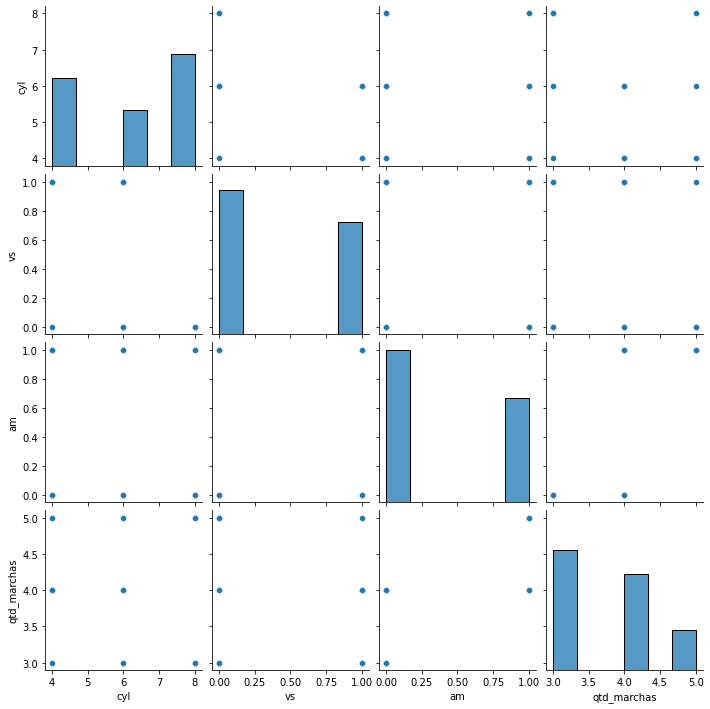

In [ ]:
# USANDO O MÉTODO SPEARMAN E QUI-QUADRADO

from scipy.stats import spearmanr

# De todo o nosso dataset apenas 4 variáveis seguem o pressuposto da correlação.

X = carros[['cyl', 'vs', 'am', 'qtd_marchas']] # quantidade de cilindros, formato do motor, tipo do câmbio e quantidade de marchas
sns.pairplot(X) # matriz de pairplot
# Olhando para a matriz de gráficos, eu consigo ver que, nos histogramas os meus dados não apresentam...
# ... uma distribuição normal. E eu também consigo investigar que, olhando os scartter plots, ...
# ... eles são variáveis ordinais e não linearmente relacionados.


In [ ]:
cyl = carros['cyl']
vs = carros['vs']
am = carros['am']
qtd_marchas = carros['qtd_marchas']

coeficiente, p_valor = spearmanr(cyl, vs)
print(f"Correlação de Spearman: {coeficiente :.3}")

Correlação de Spearman: -0.814


In [ ]:
coeficiente, p_valor = spearmanr(cyl, am)
print(f"Correlação de Spearman: {coeficiente :.3}")

Correlação de Spearman: -0.522


In [ ]:
coeficiente, p_valor = spearmanr(cyl, qtd_marchas)
print(f"Correlação de Spearman: {coeficiente :.3}")

Correlação de Spearman: -0.564


In [ ]:
# Acima conseguimos ver que os cilindros e o formato do motor têm uma relação muito forte ...
# ... enquanto os cilindros e tipo de câmbio e cilindros e a quantidade de marchas têm ...
# ... um relação mais amena. 

In [ ]:
# Agora iremos realizar o calculo do QUI-QUADRADO
# Para isso, nós precisamos comeeçar fazendo um crossTAB

tab = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency
chi2, p, dof, exp = chi2_contingency(tab.values)
print(f'Qui_quadrado: {chi2 :.3} p-valor {p:.3}') 

Qui_quadrado: 8.74 p-valor 0.0126


In [ ]:
tab = pd.crosstab(cyl, vs)

chi2, p, dof, exp = chi2_contingency(tab.values)
print(f'Qui_quadrado: {chi2 :.3} p-valor {p:.3}') 

Qui_quadrado: 21.3 p-valor 2.32e-05


In [ ]:
tab = pd.crosstab(cyl, qtd_marchas)

chi2, p, dof, exp = chi2_contingency(tab.values)
print(f'Qui_quadrado: {chi2 :.3} p-valor {p:.3}') 

Qui_quadrado: 18.0 p-valor 0.00121
